In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emp_attrition.csv")
df

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3.0,1.0,Research Scientist,1.0,1,7/25/2016 19:04,Yes,11,3,10.0,3348,Yes
1,32.0,Travel_Rarely,Sales,4,Medical,4,Male,1.0,3.0,Sales Executive,4.0,1,8/21/2011 16:29,No,11,3,14.0,10400,Yes
2,40.0,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3.0,1.0,Laboratory Technician,1.0,3,9/22/2010 6:12,No,14,3,5.0,2018,Yes
3,42.0,Travel_Rarely,Research & Development,7,Medical,2,Female,4.0,2.0,Research Scientist,2.0,6,11/18/2014 11:17,Yes,16,3,1.0,2372,No
4,43.0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3.0,3.0,Manufacturing Director,1.0,8,03-09-2011 11:58,No,11,3,8.0,10820,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,15.0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,2.0,2.0,Research Scientist,3.0,2,1/20/2014 20:49,No,8,2,10.0,14708,No
21377,5.0,Travel_Frequently,Sales,14,Marketing,3,Male,2.0,2.0,Human Resources,1.0,4,5/25/2016 22:09,Yes,10,1,6.0,6635,No
21378,56.0,Non-Travel,Research & Development,1,Marketing,2,Male,3.0,2.0,Sales Representative,1.0,1,8/19/2016 16:39,Yes,3,1,12.0,3491,No
21379,23.0,Travel_Frequently,Sales,9,Marketing,4,Male,3.0,1.0,Sales Representative,1.0,1,10-07-2015 10:40,No,19,3,1.0,1790,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21381 entries, 0 to 21380
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      21355 non-null  float64
 1   BusinessTravel           21347 non-null  object 
 2   Department               21339 non-null  object 
 3   DistanceFromHome         21334 non-null  object 
 4   EducationField           21353 non-null  object 
 5   EnvironmentSatisfaction  21342 non-null  object 
 6   Gender                   21331 non-null  object 
 7   JobInvolvement           21358 non-null  float64
 8   JobLevel                 21350 non-null  float64
 9   JobRole                  21345 non-null  object 
 10  JobSatisfaction          21352 non-null  float64
 11  NumCompaniesWorked       21333 non-null  object 
 12  Date                     21381 non-null  object 
 13  OverTime                 21333 non-null  object 
 14  PercentSalaryHike     

In [4]:
df.isnull().sum()

Age                        26
BusinessTravel             34
Department                 42
DistanceFromHome           47
EducationField             28
EnvironmentSatisfaction    39
Gender                     50
JobInvolvement             23
JobLevel                   31
JobRole                    36
JobSatisfaction            29
NumCompaniesWorked         48
Date                        0
OverTime                   48
PercentSalaryHike          15
PerformanceRating          30
YearsAtCompany             48
MonthlyIncome              16
Attrition                  38
dtype: int64

In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].median())

In [6]:
df.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
NumCompaniesWorked         0
Date                       0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
MonthlyIncome              0
Attrition                  0
dtype: int64

In [7]:
df.duplicated().sum()

251

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.columns:
    
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('*************************************')

Travel_Rarely        8689
Travel_Frequently    6516
Non-Travel           5925
Name: BusinessTravel, dtype: int64
*************************************
Research & Development    8336
Sales                     7181
Human Resources           5613
Name: Department, dtype: int64
*************************************
1        1365
2        1118
9         899
3         884
8         862
10        834
7         831
5         792
6         785
4         742
26        719
24        718
16        718
22        709
11        688
15        685
12        678
20        669
17        668
25        655
13        651
23        644
28        641
18        626
27        623
14        611
19        610
21        605
29         99
$27.0       1
Name: DistanceFromHome, dtype: int64
*************************************
Life Sciences       4694
Medical             4091
Marketing           3297
Technical Degree    3190
Other               3077
Human Resources     2780
$Human Resources       1
Name: EducationFi

In [11]:
df['PerformanceRating'].unique()

array(['3', '1', '2', '2.0$'], dtype=object)

In [12]:
df['PerformanceRating'].replace("2.0$","2", inplace=True)

In [13]:
arr = ['?','$']

# Detect: Unknown Values
for i in arr:
  for j in df.columns:
    print("Front: ",df[j].astype(str).str.startswith(i).sum(),end=' | ')
    print("Rear: ", df[j].astype(str).str.endswith(i).sum(),end=' | ')
    print("Symbol: ", i, " | ","Column: ",j)

# Treat: Unknown Values
for i in arr:
    for j in df.columns:
        if df[j].astype(str).str.startswith(i).sum() or df[j].astype(str).str.endswith(i).sum():
            print(i, j, sep=' => ') 
            df[j] = df[j].apply(lambda x: x.replace(i,'') if i in str(x) else x)

# Change datatype
for i in df.columns:
  n = df[i].iloc[0]
  if i == 'Date':
    df[i] = pd.to_datetime(df[i])
  elif not isinstance(n,np.float64) and n[0].isnumeric():
    df[i] = df[i].astype(float)

# counts of total datatypes
from collections import Counter as ct
print(ct([df[i].dtype for i in df.columns]))


Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  Age
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  BusinessTravel
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  Department
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  DistanceFromHome
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  EducationField
Front:  1 | Rear:  0 | Symbol:  ?  |  Column:  EnvironmentSatisfaction
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  Gender
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  JobInvolvement
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  JobLevel
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  JobRole
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  JobSatisfaction
Front:  0 | Rear:  1 | Symbol:  ?  |  Column:  NumCompaniesWorked
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  Date
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  OverTime
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  PercentSalaryHike
Front:  0 | Rear:  0 | Symbol:  ?  |  Column:  PerformanceRating
Front:  0 | Rear:  0 | Symbol:  ?  |  

<AxesSubplot:>

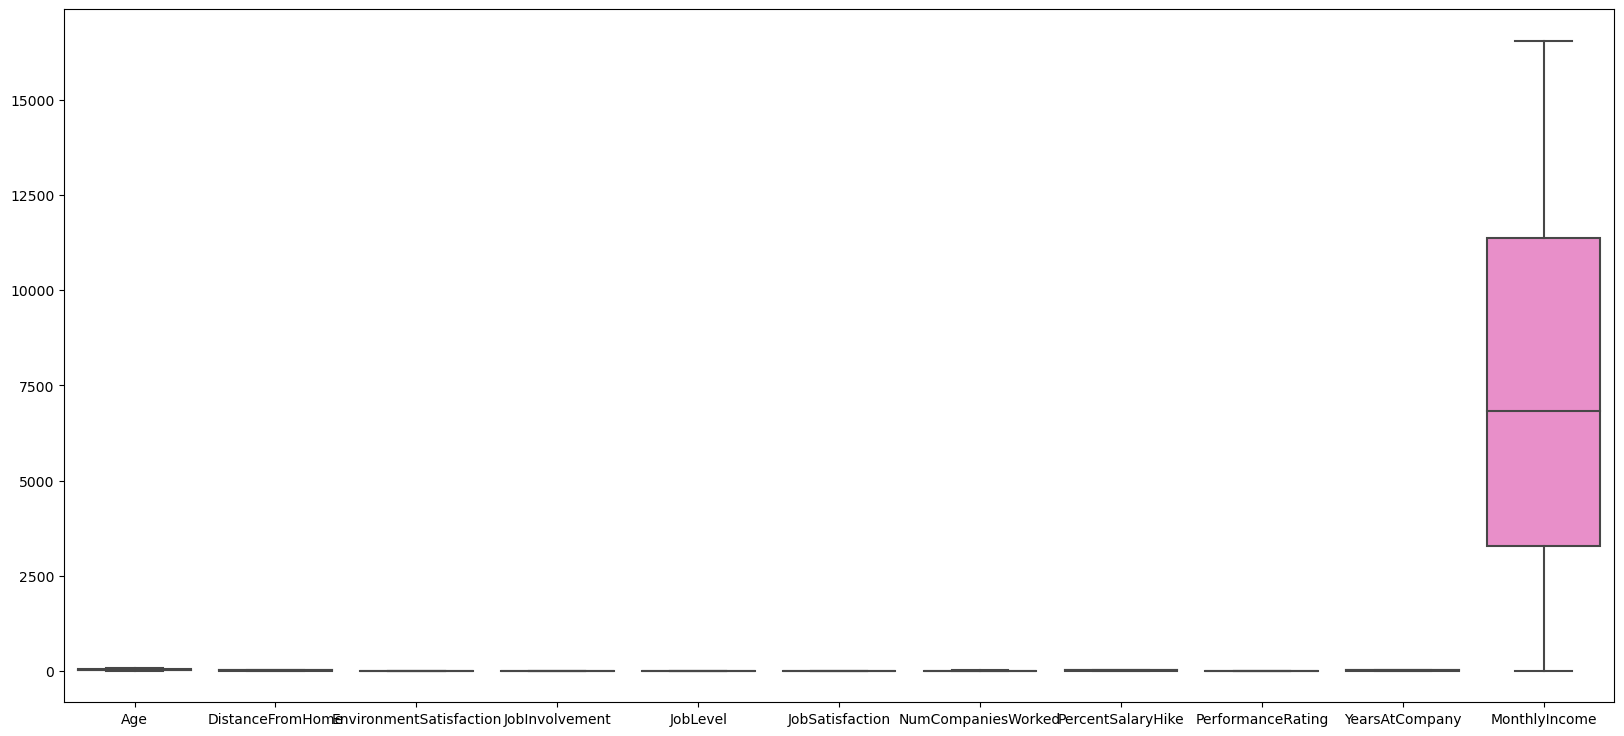

In [14]:
plt.figure(figsize=(20,9))
sns.boxplot(data=df)

In [16]:
def outliers(col):
    
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw, uw
outliers(df['Age'])  

(-17.0, 79.0)

In [16]:
for i in ['Age']:
    
    lw,uw = outliers(df[i])
    
    df[i] = np.where(df[i] < lw,lw,df[i])
    df[i] = np.where(df[i] > uw,uw,df[i])       

C:\conda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

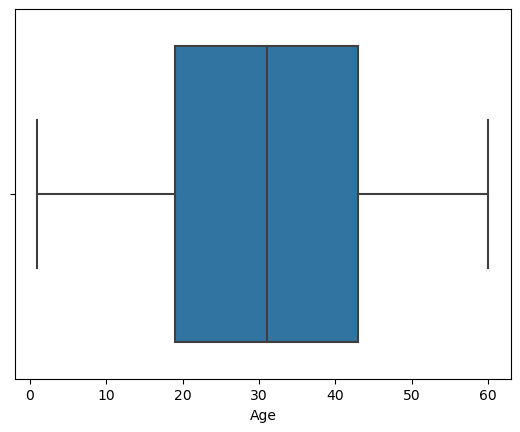

In [17]:
sns.boxplot(df['Age'])

In [18]:
data = df[df['Attrition'] == 'Yes']
avg = data[['Age','MonthlyIncome','PercentSalaryHike','PerformanceRating']].mean()
print(avg)

Age                    30.231225
MonthlyIncome        7468.976877
PercentSalaryHike      10.371223
PerformanceRating       1.801321
dtype: float64


In [22]:
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,Date,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,MonthlyIncome,Attrition
0,33.0,Travel_Frequently,Research & Development,3.0,Life Sciences,1.0,Male,3.0,1.0,Research Scientist,1.0,1.0,2016-07-25 19:04:00,Yes,11.0,3.0,10.0,3348.0,Yes
1,32.0,Travel_Rarely,Sales,4.0,Medical,4.0,Male,1.0,3.0,Sales Executive,4.0,1.0,2011-08-21 16:29:00,No,11.0,3.0,14.0,10400.0,Yes
2,40.0,Travel_Rarely,Research & Development,9.0,Life Sciences,4.0,Male,3.0,1.0,Laboratory Technician,1.0,3.0,2010-09-22 06:12:00,No,14.0,3.0,5.0,2018.0,Yes
3,42.0,Travel_Rarely,Research & Development,7.0,Medical,2.0,Female,4.0,2.0,Research Scientist,2.0,6.0,2014-11-18 11:17:00,Yes,16.0,3.0,1.0,2372.0,No
4,43.0,Travel_Frequently,Research & Development,27.0,Life Sciences,3.0,Female,3.0,3.0,Manufacturing Director,1.0,8.0,2011-03-09 11:58:00,No,11.0,3.0,8.0,10820.0,No


<AxesSubplot:ylabel='Department'>

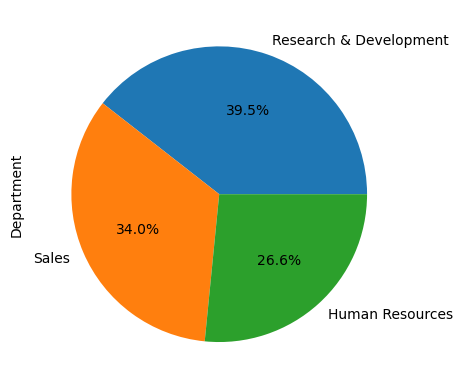

In [27]:
df['Department'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<AxesSubplot:xlabel='Attrition,Gender'>

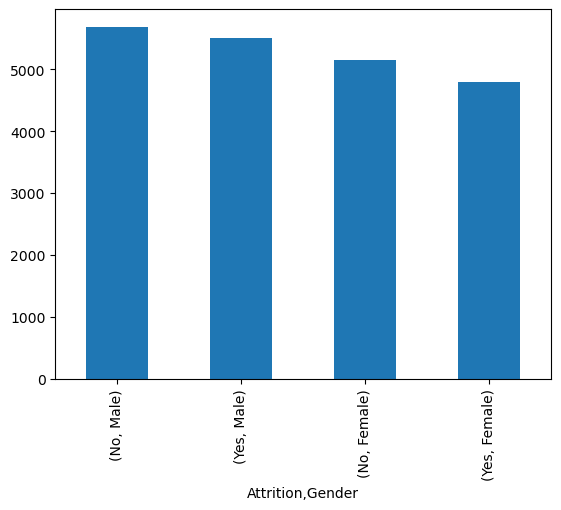

In [32]:
arr = df[['Attrition','Gender']].value_counts()
arr.plot(kind = 'bar',x= 'Attrition,Gender',y='count')

<AxesSubplot:xlabel='JobRole', ylabel='Age'>

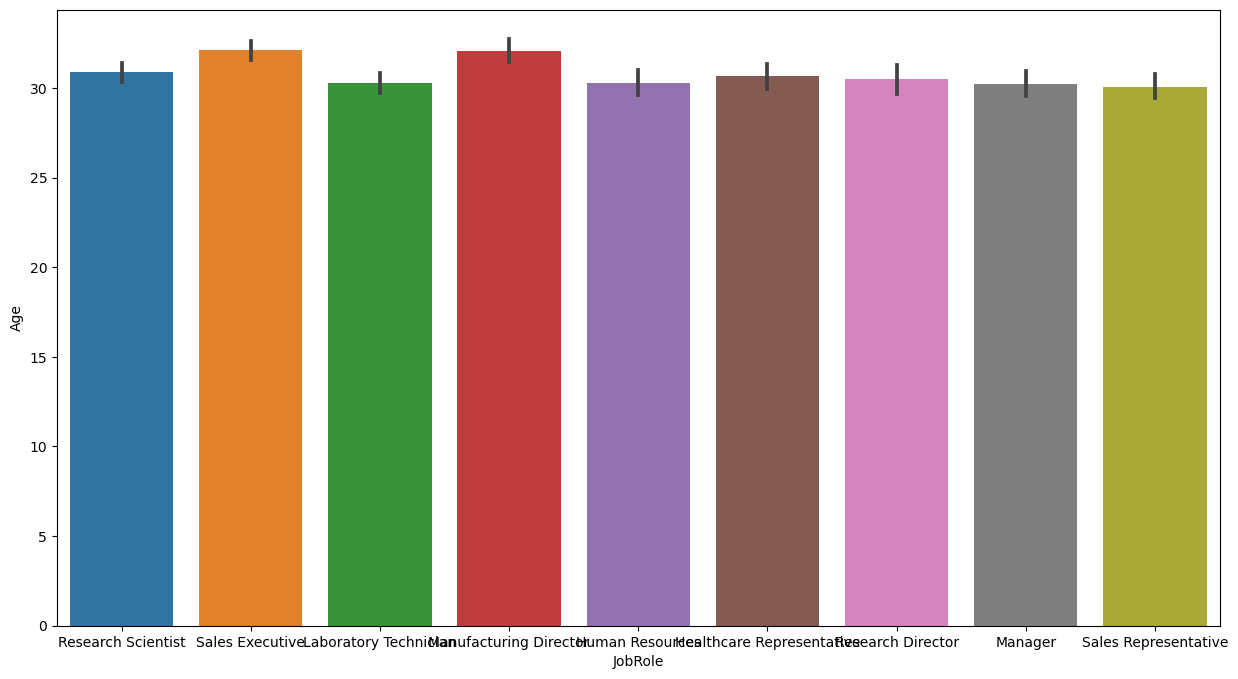

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,y = 'Age',x = 'JobRole')

In [37]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'NumCompaniesWorked', 'Date',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'MonthlyIncome', 'Attrition'],
      dtype='object')

<AxesSubplot:xlabel='OverTime', ylabel='MonthlyIncome'>

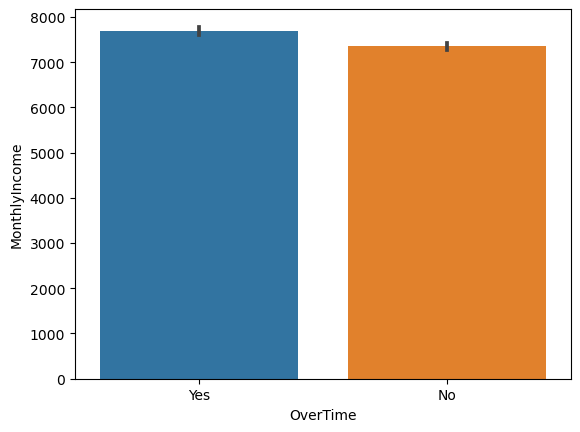

In [40]:
sns.barplot(data=df,x = 'OverTime',y = 'MonthlyIncome')